# Praktikumi nimi

Tudengi Nimi  
Kuupäev  
jne

In [1]:
# laadime vajalikud töövahendid
# see lahter tuleb alati esimesena käivitada töölehe avamisel
import numpy as np
from numpy import sqrt, exp, log, sin, cos, tan, polyfit
from scipy.optimize import curve_fit
import pandas as pd
pd.set_option('display.max_rows', 20)
from matplotlib.pyplot import *
from matplotlib import rcParams
rcParams['figure.dpi'] = 100
rcParams['lines.markersize'] = 4
rcParams['font.size'] = 12
rcParams['axes.prop_cycle'] = cycler('color', 'brgmyk')

## Eksperimendi kirjeldus

Siia võiks midagi kirjutada ...

![](katse.jpg)

## Katseandmed

Avades andmefaili tekstiredaktoriga, näeme et esimesed 7 rida andmeid ei sisalda, kümnenderaldaja on koma, andmetulpasid on 4 tükki ja need on eraldatud tabulatsioonisümboliga. Selliste andmete lugemiseks sobib `pandas.read_table` (veidi lihtsamaid andmeid võiks lugeda ka funktsiooniga `numpy.loadtxt`).

(Mistahes funktsiooni kohta lisainfo saamiseks guugelda vastavaid märksõnu, näiteks `pandas read_table`.)

In [3]:
tabel = pd.read_table('katse.txt', skiprows=7, decimal=',', sep='\t',
                      usecols=(0, 1, 2, 3),
                      names=('t', 'T1', 'T2', 'T3'))
tabel.index += 1  # muidu algavad reanumbrid 0-st
tabel

t    T1    T2    T3
1      0.0  22.1  22.0  22.9
2      0.5  22.1  22.0  23.0
3      1.0  22.2  22.0  23.1
4      1.5  22.3  22.1  23.2
5      2.0  22.3  22.1  23.2
6      2.5  22.4  22.2  23.3
7      3.0  22.4  22.3  23.4
8      3.5  22.5  22.4  23.5
9      4.0  22.6  22.5  23.5
10     4.5  22.6  22.6  23.6
..     ...   ...   ...   ...
472  235.5  72.7  46.8  66.6
473  236.0  72.8  46.8  66.6
474  236.5  72.9  46.8  66.7
475  237.0  73.0  46.8  66.7
476  237.5  73.2  46.9  66.8
477  238.0  73.3  46.9  66.8
478  238.5  73.4  47.0  66.9
479  239.0  73.5  47.0  66.9
480  239.5  73.5  47.1  67.0
481  240.0  73.7  47.1  67.1

[481 rows x 4 columns]

Tulemuseks on `pandas.DataFrame` objekt, mille atribuut `values` annab kõik arvandmed kahemõõtmelise NumPy massiivina (`ndarray`).

In [4]:
tabel.values.shape

(481, 4)

Edasiseks andmetöötluseks eraldame veeruvektorid. Algses massiivis andmed on ridadekaupa. Et saada veergudekaupa, tuleb massiiv transponeerida:

In [7]:
t, T1, T2, T3 = tabel.values.transpose()
len(t)  # andmevektori pikkus peab olema sama mis enne oli ridade arv

481

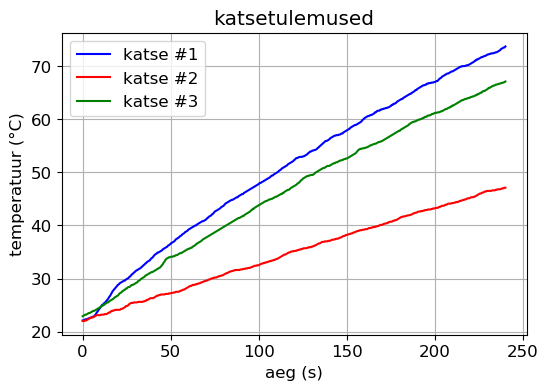

In [8]:
plot(t, T1, label='katse #1')
plot(t, T2, label='katse #2')
plot(t, T3, label='katse #3')
xlabel('aeg (s)')
ylabel('temperatuur (°C)')
title('katsetulemused')
legend()
grid()
show()

## Arvutused

Tähistame kasuliku kuumutusvõimsuse $N$, vee massi $m$ ja erisoojuse $c$, toatemperatuuri $T_0$ ja loeme soojuskadude võimsuse võrdeliseks temperatuuride vahega (võrdetegur $k$), siis $$N\,dt=mc\,dT+k(T-T_0)\,dt.\qquad (1)$$ Madalatel temperatuuridel soojuskaod on võrdlemisi väikesed, nii et viimase liikme võib ära jätta ja temperatuur kasvab lineaarselt: $T(t)\approx T_0+a t$, kus $a=N/(mc)$. Sobitades sirge läbi andmete algusosa, saame leida $a$. Valime teatud arvu punkte andmeseeria algusest:

In [9]:
n = 60  # mitu punkti algusest võtta
t[n-1]  # millisele maksimaalsele ajahetkele see vastab ?
        # vajadusel korrigeerime n väärtust

29.5

Edasisteks arvutusteks valime välja ühe andmeseeria, näiteks `T1`.

In [15]:
T = T1

Sirge on 1. järku polünoom, ja suvalise polünoomi sobitab läbi katsepunktide `numpy.polyfit`. Alam-massiivi saame välja eraldada viilutamise (*slicing*) teel, näiteks `t[0:n]` tagastab ajavektorist esimesed `n` elementi.

In [16]:
t_algus, T_algus = t[0:n], T[0:n]

a, T0 = polyfit(t_algus, T_algus, 1)
print('tõus = %.4g °C/s' % a)
print('algtemp. = %.4g °C' % T0)

tõus = 0.3479 °C/s
algtemp. = 21.29 °C


Võrdleme lähendussirget andmepunktidega. Aritmeetilisi tehteid jm matemaatilisi operatsioone saab teostada tervete NumPy massiividega (st need operatsioonid on vektoriseeritud).

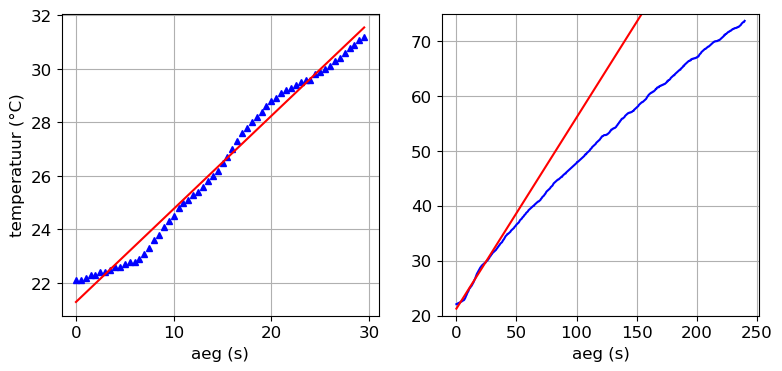

In [21]:

figure(figsize=(9,4))
subplot(121)  # kaks graafikut ühes reas, tegeleme 1. graafikuga
T_sirge = T0 + a * t_algus  # lähendussirge, samadel aja väärtustel
plot(t_algus, T_algus, '^')
plot(t_algus, T_sirge, '-')
xlabel('aeg (s)')
ylabel('temperatuur (°C)')
grid()
T_sirge = T0 + a * t  # lähendussirge võrdluses terve kõveraga
subplot(122)  # tegeleme 2. graafikuga
plot(t, T)
plot(t, T_sirge)
ylim(20, 75)
xlabel('aeg (s)')
grid()
show()

Seosest (1) saame diferentsiaalvõrrandi $\dot T+b(T-T_0)-a=0$, kus $b=k/(mc)$. Võrrandi lahend on $$T(t)=T_0+\frac{a}{b}\left(1-e^{-bt}\right).$$ Katsetame erinevate $b$ väärtustega, kas tulemus sarnaneb eksperimentaalse kõveraga:

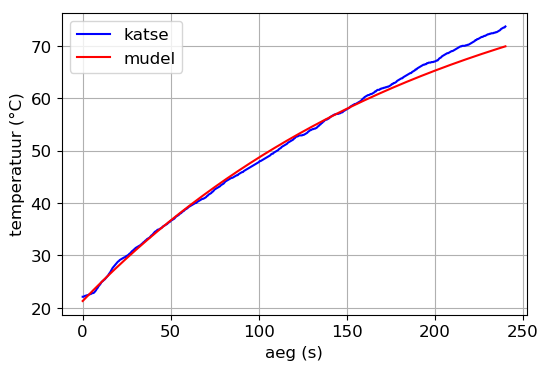

In [22]:
b = 0.005
T_mudel = T0 + (a/b)*(1-exp(-b*t))

plot(t, T, label='katse')
plot(t, T_mudel, label='mudel')
xlabel('aeg (s)')
ylabel('temperatuur (°C)')
legend()
grid()
show()

Optimeerime kõiki parameetreid:

In [23]:
mudel = lambda t, T0, a, b: T0 + (a/b)*(1-exp(-b*t))
(T0, a, b), _ = curve_fit(mudel, t, T, (21, 0.35, 0.005))
print('T0 = %.4g °C' % T0)
print('a = %.4g °C/s' % a)
print('b = %.4g 1/s' % b)

T0 = 22.45 °C
a = 0.2944 °C/s
b = 0.002888 1/s


Võrdleme eksperimendiga:

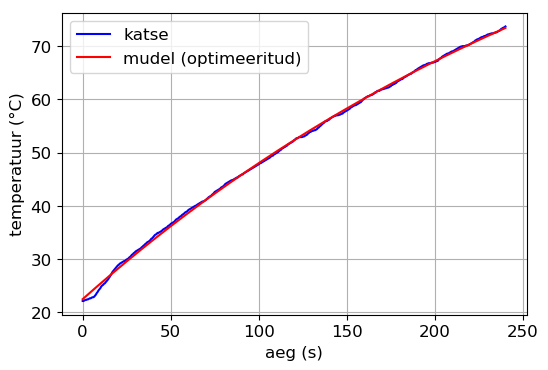

In [24]:
T_mudel = mudel(t, T0, a, b)

plot(t, T, label='katse')
plot(t, T_mudel, label='mudel (optimeeritud)')
xlabel('aeg (s)')
ylabel('temperatuur (°C)')
legend()
grid()
show()